# RNN으로 여행자 수 예측

In [118]:
# 패키지 수입
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.layers import Dense, LSTM, InputLayer
from keras.models import Sequential
from sklearn.model_selection import train_test_split


In [119]:
# 파라미터
MY_PAST = 3             # 미래 예측을 위해 사용하는 과거 데이터 수, 입력 데이터 수
MY_SPLIT = 0.8          # 학습용 데이터 비율
MY_HIDDEN = 300         # RNN 셀 내부 복잡도 (다음 단으로 넘겨 주는 데이터 차원 수)
MY_SHAPE = (MY_PAST,1)  # RNN 입력 데이터 모양
MY_EPOCH = 300          # 반복 학습 수

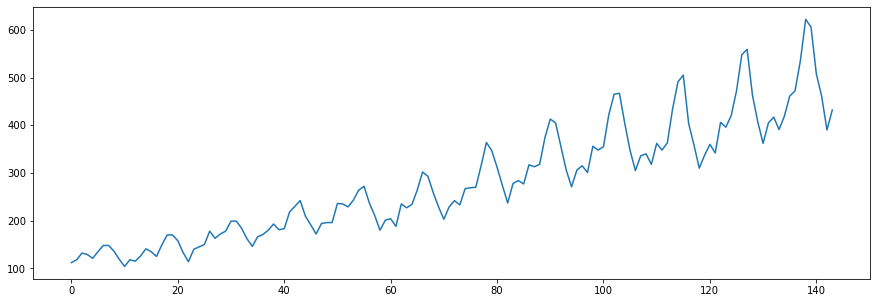

In [120]:
# 데이터 읽기
data = pd.read_csv('airline.csv',header=None,usecols=[1])

# 샘플 출력
# display(data.head(5))
# print(data.describe())

# 그래프 그리기
plt.figure(figsize=(15,5))
plt.plot(data)
plt.show()

In [121]:
# 데이터 정규화 : MinMaxScaler
scaler = MinMaxScaler()
m_data = scaler.fit_transform(data)
# print('정규화 전',data.to_numpy().flatten())
# print('정규화 후',m_data.flatten())

# numpy를 pandas로 재전환 (정규화 하면 numpy가 됨)
# m_data = pd.DataFrame(m_data)
# print(m_data.describe())
# plt.figure(figsize=(15,5))
# plt.plot(m_data)

In [122]:
# 데이터 분할
split = []
size = len(m_data)
print('데이터 수:', size)

for i in range(size - MY_PAST):
    split.append(m_data[i:i + MY_PAST + 1])

print(m_data.flatten())
print(split[0])
print(split[1])
print("총 4개짜리 묶음 {}개".format(len(split)))

데이터 수: 144
[0.01544402 0.02702703 0.05405405 0.04826255 0.03281853 0.05984556
 0.08494208 0.08494208 0.06177606 0.02895753 0.         0.02702703
 0.02123552 0.04247104 0.07142857 0.05984556 0.04054054 0.08687259
 0.12741313 0.12741313 0.1042471  0.05598456 0.01930502 0.06949807
 0.07915058 0.08880309 0.14285714 0.11389961 0.13127413 0.14285714
 0.18339768 0.18339768 0.15444015 0.11196911 0.08108108 0.11969112
 0.12934363 0.14671815 0.17181467 0.14864865 0.15250965 0.22007722
 0.24324324 0.26640927 0.2027027  0.16795367 0.13127413 0.17374517
 0.17760618 0.17760618 0.25482625 0.25289575 0.24131274 0.26833977
 0.30888031 0.32432432 0.25675676 0.20656371 0.14671815 0.18725869
 0.19305019 0.16216216 0.25289575 0.23745174 0.25096525 0.30888031
 0.38223938 0.36486486 0.2992278  0.24131274 0.19111969 0.24131274
 0.26640927 0.24903475 0.31467181 0.31853282 0.32046332 0.40733591
 0.5019305  0.46911197 0.4015444  0.32818533 0.25675676 0.33590734
 0.34749035 0.33397683 0.41119691 0.4034749  0.4131

In [123]:
# 분할 데이터 추가 처리
print(type(split))
split = np.array(split)
print(type(split))
print('시계열 분할 데이터 모양 : ',split.shape)
print(split)

<class 'list'>
<class 'numpy.ndarray'>
시계열 분할 데이터 모양 :  (141, 4, 1)
[[[0.01544402]
  [0.02702703]
  [0.05405405]
  [0.04826255]]

 [[0.02702703]
  [0.05405405]
  [0.04826255]
  [0.03281853]]

 [[0.05405405]
  [0.04826255]
  [0.03281853]
  [0.05984556]]

 [[0.04826255]
  [0.03281853]
  [0.05984556]
  [0.08494208]]

 [[0.03281853]
  [0.05984556]
  [0.08494208]
  [0.08494208]]

 [[0.05984556]
  [0.08494208]
  [0.08494208]
  [0.06177606]]

 [[0.08494208]
  [0.08494208]
  [0.06177606]
  [0.02895753]]

 [[0.08494208]
  [0.06177606]
  [0.02895753]
  [0.        ]]

 [[0.06177606]
  [0.02895753]
  [0.        ]
  [0.02702703]]

 [[0.02895753]
  [0.        ]
  [0.02702703]
  [0.02123552]]

 [[0.        ]
  [0.02702703]
  [0.02123552]
  [0.04247104]]

 [[0.02702703]
  [0.02123552]
  [0.04247104]
  [0.07142857]]

 [[0.02123552]
  [0.04247104]
  [0.07142857]
  [0.05984556]]

 [[0.04247104]
  [0.07142857]
  [0.05984556]
  [0.04054054]]

 [[0.07142857]
  [0.05984556]
  [0.04054054]
  [0.08687259]]

 [

In [124]:
# 데이터 분리
X_data = split[:,0:MY_PAST]
# print(X_data)
print('입력 데이터 모양:', X_data.shape)

Y_data = split[:,-1]
print('출력 데이터 모양:',Y_data.shape)

print(X_data[0])
print(Y_data[0])

print('출력 데이터 모양: ',Y_data.shape)

입력 데이터 모양: (141, 3, 1)
출력 데이터 모양: (141, 1)
[[0.01544402]
 [0.02702703]
 [0.05405405]]
[0.04826255]
출력 데이터 모양:  (141, 1)
